In [90]:
from coders import BitStream, WavStream
from coders import SimplePSK as Coder
from gsmpipeline.util import quickplot as qp
import scipy.io.wavfile
%matplotlib inline

In [91]:
input_stream = BitStream(np.random.randint(2, size=20))
encoded = Coder.encode(input_stream)
scipy.io.wavfile.write('test.wav', Coder.rate.current, encoded)
decoded_rate, decoded = scipy.io.wavfile.read('test.wav')
noisy = np.random.normal(0, 1, len(decoded)) * 0.2 + decoded
wavstream = WavStream(noisy, decoded_rate, Coder.symbol_duration.current)
# check = input_stream.assymbolsize(2) == Coder.decode(decoded_rate, wavstream)
sns.tsplot(wavstream[:2000])
print('Length:', len(wavstream))
# print('Quality:', check.sum()/len(check))

error: argument out of range

In [92]:
cls = Coder
rate = decoded_rate
stream = input_stream[:4]

In [94]:
f = cls.frequency.current
f = 1
r = cls.rate.current
symbol_size = cls.symbol_size.current
symbol_len = int(r * cls.symbol_duration.current)
symbol_len = 20

stream = stream.assymbolsize(symbol_size)
stream_duration = len(stream) * symbol_len
levels = 2**symbol_size

base = np.linspace(0, f * len(stream) * 2 * np.pi, stream_duration)
shifts = (stream * 2 * np.pi / levels).repeat(symbol_len)
wave = np.sin(base + shifts)

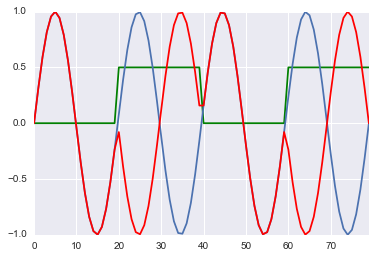

In [95]:
sns.tsplot(shifts / (2*np.pi), color='g')
sns.tsplot(np.sin(base))
sns.tsplot(wave, color='r')

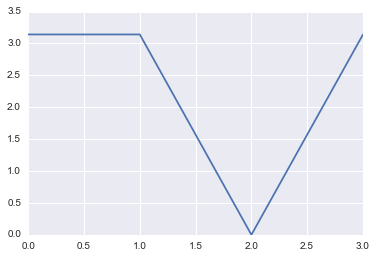

In [58]:
sns.tsplot([shifts[i] for i in stream])

In [54]:
shifts = np.linspace(0, 2*np.pi, 2**n + 1)[:-1]
shifts

array([ 0.        ,  3.14159265])

In [62]:
(stream / 2**n) * 2 * np.pi

BitStream([ 3.14159265,  3.14159265,  0.        ,  3.14159265])

In [66]:
stream = BitStream([1, 1, 0, 1])
stream.assymbolsize(2)

BitStream([3, 1], symbolsize=2)

In [72]:
(stream.assymbolsize(2) / 2**2) * 2 * np.pi

BitStream([ 4.71238898,  1.57079633], symbolsize=2)

In [73]:
(stream.assymbolsize(2) / 2**2)

BitStream([ 0.75,  0.25], symbolsize=2)